# H-H Cable model (unmyelinated)

The Hodgkin-Huxley Cable Model integrates the spatial characteristics of cable theory with the active membrane dynamics of the Hodgkin-Huxley (HH) equations. Unlike the classical point-neuron HH model which treats the entire neuron as isopotential, the HH cable model includes spatial propagation along an extended structure. This extends beyond basic compartment or equivalent-cylinder models by incorporating both detailed ion channel kinetics and realistic signal propagation, enabling the simulation of action potential initiation, propagation, and the complex spatiotemporal dynamics that occur in axons and dendrites.

## Key Properties

1. **Active Propagation**: Models action potential propagation along spatial structures
2. **Voltage-Gated Conductances**: Incorporates sodium, potassium, and leak conductances that vary with voltage and time
3. **Spatial Heterogeneity**: Can represent varying channel densities and properties along different regions
4. **Conduction Velocity**: Captures how action potentials travel at finite speeds determined by cable properties
5. **Non-Linear Dynamics**: Exhibits threshold behavior, refractory periods, and frequency-dependent propagation
6. **Bi-Directional Propagation**: Action potentials can travel in both directions (orthodromic and antidromic)

## Mathematical Description

The HH cable model is described by a partial differential equation combining cable theory with HH dynamics:

Cm(∂V/∂t) = (λ²∂²V/∂x²) - gNa·m³·h·(V-ENa) - gK·n⁴·(V-EK) - gL·(V-EL) + Iext

With gating variables governed by:
dm/dt = αm(V)·(1-m) - βm(V)·m
dh/dt = αh(V)·(1-h) - βh(V)·h
dn/dt = αn(V)·(1-n) - βn(V)·n

Parameters:
- V(x,t): Membrane potential at position x and time t
- m(x,t), h(x,t), n(x,t): Gating variables at position x and time t
- Cm: Specific membrane capacitance (typically 1 μF/cm²)
- λ = sqrt(rm/ri): Length constant
- rm: Specific membrane resistance
- ri: Intracellular resistivity (typically 70-300 Ω·cm)
- gNa: Maximum sodium conductance (typically 120 mS/cm²)
- gK: Maximum potassium conductance (typically 36 mS/cm²)
- gL: Leak conductance (typically 0.3 mS/cm²)
- ENa: Sodium reversal potential (typically +50 mV)
- EK: Potassium reversal potential (typically -77 mV)
- EL: Leak reversal potential (typically -54.4 mV)
- d: Cable diameter (typically 0.5-20 μm)
- Ra = ri/(π·(d/2)²): Axial resistance per unit length
- α and β: Voltage-dependent rate constants for channel gating

State Variables:
- V(x,t): Membrane potential at each position x and time t
- m(x,t), h(x,t), n(x,t): Channel gating variables at each position x and time t

Time and Space-related variables:
- dt: Time step for numerical integration (typically 0.01-0.1 ms)
- dx: Spatial discretization step (typically 10-100 μm)
- t: Current simulation time
- tmax: Maximum simulation time
- X: Position along the cable (0 ≤ X ≤ L)

## Algorithm

1. Initialize state variables for all positions x
   - V(x,0) = Vrest (typically -65 mV)
   - m(x,0) = m∞(Vrest)
   - h(x,0) = h∞(Vrest)
   - n(x,0) = n∞(Vrest)
   - Set boundary and initial conditions

2. Spatial discretization
   - Divide cable into N segments of length dx
   - Create position vector X = [0, dx, 2dx, ..., L]

3. For each time step from t=0 to t=tmax:
   
   a. Apply boundary conditions
      - At x=0: Typically voltage clamp, current injection, or sealed end
      - At x=L: Typically sealed end or open end
   
   b. For each position x:
      - Compute second spatial derivative using central difference:
        ∂²V/∂x² ≈ (V(x+dx,t) - 2V(x,t) + V(x-dx,t))/dx²
      
      - Compute ionic currents:
        INa = gNa·m³·h·(V-ENa)
        IK = gK·n⁴·(V-EK)
        IL = gL·(V-EL)
      
      - Compute temporal derivative of voltage:
        ∂V/∂t = (λ²∂²V/∂x² - INa - IK - IL + Iext)/Cm
      
      - Compute rate constants α and β for each gating variable based on local V
      
      - Compute derivatives of gating variables:
        dm/dt = αm(V)·(1-m) - βm(V)·m
        dh/dt = αh(V)·(1-h) - βh(V)·h
        dn/dt = αn(V)·(1-n) - βn(V)·n
   
   c. Update all state variables using numerical integration:
      - V(x,t+dt) = V(x,t) + dt·∂V/∂t
      - m(x,t+dt) = m(x,t) + dt·dm/dt
      - h(x,t+dt) = h(x,t) + dt·dh/dt
      - n(x,t+dt) = n(x,t) + dt·dn/dt
   
   d. Store variables for plotting
      - Record V(x,t) and gating variables at selected positions
   
   e. Increment time: t = t + dt

4. Analyze and visualize results
   - Plot voltage vs position at different times
   - Plot voltage vs time at different positions
   - Calculate action potential conduction velocity
   - Analyze space-time dynamics of action potential propagation

## Characteristic Behaviors

1. **Action Potential Propagation**: Self-regenerating waves of excitation that maintain amplitude
2. **Conduction Velocity**: Speed depends on axon diameter, temperature, and channel properties
3. **Refractory Period**: Time after an action potential during which excitability is reduced
4. **Saltatory Conduction**: With added myelin, action potentials jump between nodes of Ranvier
5. **Impedance Mismatch**: Reflection and transmission at branch points and diameter changes
6. **Failure of Propagation**: Action potentials can fail at branch points or regions of high capacitance

## Biological Mechanisms Represented

The HH cable model represents:
- Voltage-dependent sodium and potassium channel kinetics
- Action potential initiation and propagation
- Passive cable properties (resistance, capacitance)
- Spatial and temporal integration of signals
- Reflection and transmission at geometry changes
- Effects of axon diameter on conduction velocity
- Energy consumption during signaling

## Applications

The HH cable model is particularly useful for:
- Studying action potential propagation in axons
- Analyzing conduction failure at branch points
- Investigating effects of demyelination on signal propagation
- Modeling axon geometries with varying diameters
- Simulating extracellular recording and stimulation
- Designing neuroprosthetic devices for nerve stimulation
- Understanding pathological conditions like demyelinating diseases
- Pharmacological investigations of channel blockers on signal propagation
- Modeling the effects of temperature on neural conduction

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable

class HH_Cable:
    def __init__(self, 
                 L=1000.0,           # Length of cable (μm)
                 a=10.0,             # Radius of cable (μm)
                 dx=10.0,            # Spatial step size (μm)
                 Cm=1.0,             # Membrane capacitance (μF/cm²)
                 g_Na=120.0,         # Maximum sodium conductance (mS/cm²)
                 g_K=36.0,           # Maximum potassium conductance (mS/cm²)
                 g_L=0.3,            # Leak conductance (mS/cm²)
                 E_Na=50.0,          # Sodium reversal potential (mV)
                 E_K=-77.0,          # Potassium reversal potential (mV)
                 E_L=-54.4,          # Leak reversal potential (mV)
                 Ra=100.0,           # Axial resistance (Ω·cm)
                 V_rest=-65.0):      # Resting membrane potential (mV)
        
        # Cable properties
        self.L = L
        self.a = a
        self.dx = dx
        self.Ra = Ra
        
        # Membrane properties
        self.Cm = Cm
        self.g_Na = g_Na
        self.g_K = g_K
        self.g_L = g_L
        self.E_Na = E_Na
        self.E_K = E_K
        self.E_L = E_L
        
        # Discretize the cable
        self.N = int(L / dx) + 1  # Number of compartments
        self.x = np.linspace(0, L, self.N)  # Spatial positions
        
        # Initialize state variables
        self.V = np.ones(self.N) * V_rest
        
        # Initialize gating variables to steady-state values at resting potential
        self.m = np.ones(self.N) * self.m_inf(V_rest)
        self.h = np.ones(self.N) * self.h_inf(V_rest)
        self.n = np.ones(self.N) * self.n_inf(V_rest)
        
        # Storage for recording state variables during simulation
        self.V_history = None
        self.m_history = None
        self.h_history = None
        self.n_history = None
        self.t_array = None
        
    # Voltage-dependent rate constants for sodium activation (m)
    def alpha_m(self, V):
        return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    
    def beta_m(self, V):
        return 4.0 * np.exp(-(V + 65) / 18)
    
    # Voltage-dependent rate constants for sodium inactivation (h)
    def alpha_h(self, V):
        return 0.07 * np.exp(-(V + 65) / 20)
    
    def beta_h(self, V):
        return 1.0 / (1 + np.exp(-(V + 35) / 10))
    
    # Voltage-dependent rate constants for potassium activation (n)
    def alpha_n(self, V):
        return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
    
    def beta_n(self, V):
        return 0.125 * np.exp(-(V + 65) / 80)
    
    # Steady-state values for gating variables
    def m_inf(self, V):
        alpha = self.alpha_m(V)
        beta = self.beta_m(V)
        return alpha / (alpha + beta)
    
    def h_inf(self, V):
        alpha = self.alpha_h(V)
        beta = self.beta_h(V)
        return alpha / (alpha + beta)
    
    def n_inf(self, V):
        alpha = self.alpha_n(V)
        beta = self.beta_n(V)
        return alpha / (alpha + beta)
    
    # Time constants for gating variables
    def tau_m(self, V):
        alpha = self.alpha_m(V)
        beta = self.beta_m(V)
        return 1.0 / (alpha + beta)
    
    def tau_h(self, V):
        alpha = self.alpha_h(V)
        beta = self.beta_h(V)
        return 1.0 / (alpha + beta)
    
    def tau_n(self, V):
        alpha = self.alpha_n(V)
        beta = self.beta_n(V)
        return 1.0 / (alpha + beta)
    
    # Ionic currents
    def I_Na(self, V, m, h):
        return self.g_Na * m**3 * h * (V - self.E_Na)
    
    def I_K(self, V, n):
        return self.g_K * n**4 * (V - self.E_K)
    
    def I_L(self, V):
        return self.g_L * (V - self.E_L)
    
    # Total ionic current
    def I_ion(self, V, m, h, n):
        return self.I_Na(V, m, h) + self.I_K(V, n) + self.I_L(V)
    
    # Axial current calculation (second spatial derivative)
    def I_axial(self, V):
        # Conversion factor from μm to cm (Ra and other parameters are in cm)
        conversion = 1e-4  # 1 μm = 1e-4 cm
        
        # Calculate the factor for the axial current
        factor = self.a * conversion / (2 * self.Ra)
        
        # Initialize the axial current array
        I_ax = np.zeros_like(V)
        
        # Calculate second derivative using finite differences
        # For internal compartments
        for i in range(1, self.N - 1):
            I_ax[i] = factor * (V[i+1] - 2*V[i] + V[i-1]) / (self.dx * conversion)**2
        
        # For boundary compartments (using sealed-end boundary conditions)
        I_ax[0] = factor * 2 * (V[1] - V[0]) / (self.dx * conversion)**2
        I_ax[-1] = factor * 2 * (V[-2] - V[-1]) / (self.dx * conversion)**2
        
        return I_ax
    
    # Derivatives of state variables
    def dVdt(self, V, m, h, n, I_ext):
        I_ax = self.I_axial(V)
        I_ion_values = self.I_ion(V, m, h, n)
        return (I_ax - I_ion_values + I_ext) / self.Cm
    
    def dmdt(self, V, m):
        alpha_m = self.alpha_m(V)
        beta_m = self.beta_m(V)
        return alpha_m * (1 - m) - beta_m * m
    
    def dhdt(self, V, h):
        alpha_h = self.alpha_h(V)
        beta_h = self.beta_h(V)
        return alpha_h * (1 - h) - beta_h * h
    
    def dndt(self, V, n):
        alpha_n = self.alpha_n(V)
        beta_n = self.beta_n(V)
        return alpha_n * (1 - n) - beta_n * n
    
    # Update state variables using Euler method
    def update(self, dt, I_ext):
        # Calculate derivatives
        dV = self.dVdt(self.V, self.m, self.h, self.n, I_ext) * dt
        dm = self.dmdt(self.V, self.m) * dt
        dh = self.dhdt(self.V, self.h) * dt
        dn = self.dndt(self.V, self.n) * dt
        
        # Update state variables
        self.V += dV
        self.m += dm
        self.h += dh
        self.n += dn
    
    # Run simulation for a given time with specified stimulus
    def simulate(self, t_max, dt, I_ext_func=None, record_interval=1):
        """
        Run the simulation for t_max milliseconds with time step dt.
        
        Parameters:
        -----------
        t_max : float
            Maximum simulation time in milliseconds
        dt : float
            Time step for numerical integration in milliseconds
        I_ext_func : callable, optional
            Function that takes time and position as input and returns external current
            If None, no external current is applied
        record_interval : int, optional
            Record state variables every record_interval time steps
            
        Returns:
        --------
        tuple
            (time_points, x_positions, V_history, m_history, h_history, n_history)
            Arrays containing simulation results
        """
        n_steps = int(t_max / dt)
        n_record = int(n_steps / record_interval) + 1
        
        # Initialize arrays to store results
        self.t_array = np.linspace(0, t_max, n_record)
        self.V_history = np.zeros((n_record, self.N))
        self.m_history = np.zeros((n_record, self.N))
        self.h_history = np.zeros((n_record, self.N))
        self.n_history = np.zeros((n_record, self.N))
        
        # Record initial state
        self.V_history[0] = self.V.copy()
        self.m_history[0] = self.m.copy()
        self.h_history[0] = self.h.copy()
        self.n_history[0] = self.n.copy()
        
        # Simulation loop
        record_idx = 1
        for step in range(1, n_steps + 1):
            t = step * dt
            
            # Determine external current
            if I_ext_func is None:
                I_ext = np.zeros(self.N)
            else:
                I_ext = np.array([I_ext_func(t, x_pos) for x_pos in self.x])
            
            # Update state variables
            self.update(dt, I_ext)
            
            # Record state variables at specified intervals
            if step % record_interval == 0:
                self.V_history[record_idx] = self.V.copy()
                self.m_history[record_idx] = self.m.copy()
                self.h_history[record_idx] = self.h.copy()
                self.n_history[record_idx] = self.n.copy()
                record_idx += 1
        
        return self.t_array, self.x, self.V_history, self.m_history, self.h_history, self.n_history
    
    # Method to visualize the simulation results as a heatmap
    def plot_voltage_heatmap(self, cmap='viridis', vmin=None, vmax=None):
        """
        Plot the membrane potential as a heatmap (space vs time).
        
        Parameters:
        -----------
        cmap : str
            Colormap name
        vmin, vmax : float, optional
            Minimum and maximum values for colormap scaling
        """
        if self.V_history is None:
            raise ValueError("No simulation data available. Run simulate() first.")
        
        # Create the figure
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Set default vmin and vmax if not provided
        if vmin is None:
            vmin = np.min(self.V_history)
        if vmax is None:
            vmax = np.max(self.V_history)
        
        # Create heatmap
        im = ax.imshow(
            self.V_history.T,  # Transpose to have space on y-axis and time on x-axis
            aspect='auto',
            origin='lower',
            extent=[0, self.t_array[-1], 0, self.L],
            cmap=cmap,
            vmin=vmin,
            vmax=vmax
        )
        
        # Add labels and title
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Position (μm)')
        ax.set_title('Membrane Potential Propagation')
        
        # Add colorbar
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = plt.colorbar(im, cax=cax)
        cbar.set_label('Membrane Potential (mV)')
        
        return fig, ax
    
    # Method to create an animation of the action potential propagation
    def animate_propagation(self, interval=50, cmap='viridis', vmin=None, vmax=None):
        """
        Create an animation of the action potential propagation.
        
        Parameters:
        -----------
        interval : int
            Time between frames in milliseconds
        cmap : str
            Colormap name
        vmin, vmax : float, optional
            Minimum and maximum values for y-axis scaling
        
        Returns:
        --------
        matplotlib.animation.FuncAnimation
            Animation object
        """
        if self.V_history is None:
            raise ValueError("No simulation data available. Run simulate() first.")
        
        # Create figure and axis
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Set default vmin and vmax if not provided
        if vmin is None:
            vmin = np.min(self.V_history)
        if vmax is None:
            vmax = np.max(self.V_history)
        
        # Initial plot
        line, = ax.plot(self.x, self.V_history[0], 'b-', lw=2)
        
        # Set axis limits
        ax.set_xlim(0, self.L)
        ax.set_ylim(vmin, vmax)
        
        # Add labels and title
        ax.set_xlabel('Position (μm)')
        ax.set_ylabel('Membrane Potential (mV)')
        title = ax.set_title(f'Time: {self.t_array[0]:.2f} ms')
        
        # Add grid
        ax.grid(True)
        
        # Function to update the plot for each frame
        def update(frame):
            line.set_ydata(self.V_history[frame])
            title.set_text(f'Time: {self.t_array[frame]:.2f} ms')
            return line, title
        
        # Create animation
        ani = FuncAnimation(
            fig, update, frames=len(self.t_array),
            interval=interval, blit=True
        )
        
        return ani

Running simulation...
Simulation complete!
Generating voltage heatmap...


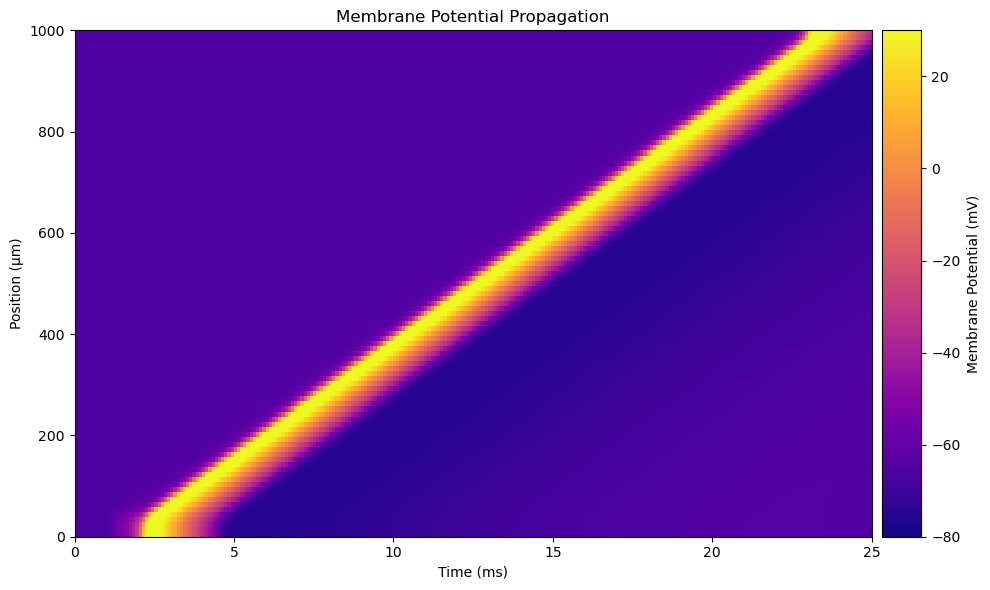

Generating voltage snapshots...


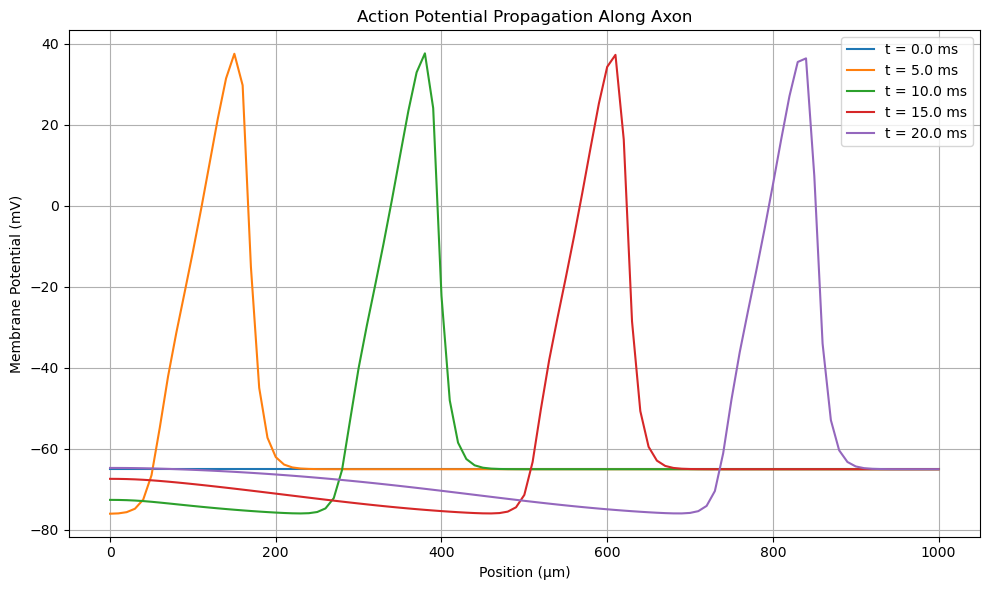

Calculating action potential propagation velocity...
Action potential propagation velocity: 0.05 m/s


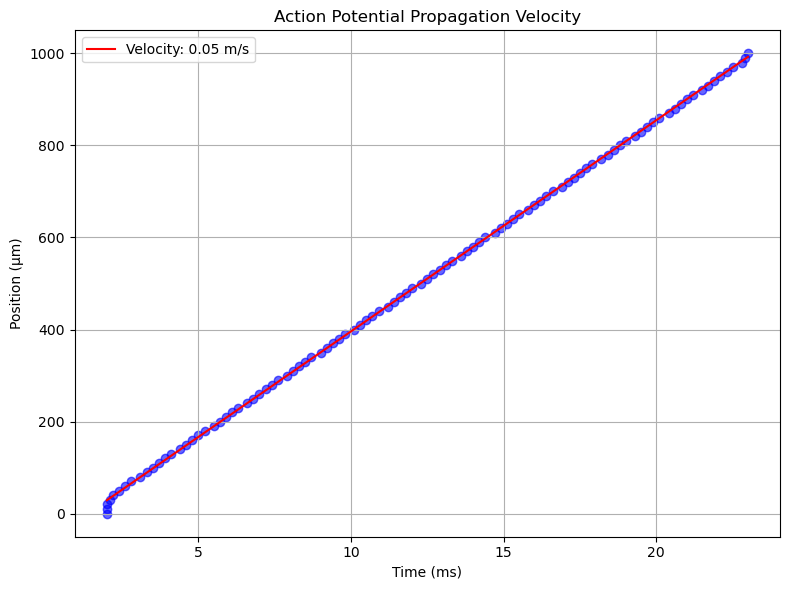

Done!


In [20]:

# Running a simulation and visualize the results

# Create a cable model
cable = HH_Cable(
    L=1000.0,    # 1000 μm = 1 mm length
    a=10.0,      # 10 μm radius
    dx=10.0,     # 10 μm spatial step
    Ra=100.0     # 100 Ω·cm axial resistance
)

# Define a stimulus function that applies current at one end of the cable
def stimulus(t, x):
    # Apply a 30 μA/cm² current pulse at the start of the cable
    # from t=1ms to t=2ms only at the first 50 μm
    if 1 <= t <= 2 and x < 50:
        return 30.0
    return 0.0

# Run the simulation
print("Running simulation...")
t_array, x_pos, V_history, m_history, h_history, n_history = cable.simulate(
    t_max=25.0,     # Simulate for 25 ms
    dt=0.01,        # Time step of 0.01 ms
    I_ext_func=stimulus,
    record_interval=10  # Record every 10 time steps to save memory
)
print("Simulation complete!")

# Plot the voltage heatmap
print("Generating voltage heatmap...")
fig, ax = cable.plot_voltage_heatmap(
    cmap='plasma',
    vmin=-80,
    vmax=30
)
plt.tight_layout()
plt.savefig('hh_cable_voltage_heatmap.png', dpi=150)
plt.show()

# Plot snapshots of the membrane potential at different times
print("Generating voltage snapshots...")
plt.figure(figsize=(10, 6))
snapshot_times = [0, 5, 10, 15, 20]  # ms
for t_idx, t_val in enumerate(snapshot_times):
    # Find closest time index
    t_idx = np.argmin(np.abs(t_array - t_val))
    plt.plot(x_pos, V_history[t_idx], label=f't = {t_array[t_idx]:.1f} ms')

plt.xlabel('Position (μm)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Action Potential Propagation Along Axon')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('hh_cable_voltage_snapshots.png', dpi=150)
plt.show()

# Extract action potential velocity
print("Calculating action potential propagation velocity...")
# Find the time when each position reaches threshold (0 mV)
threshold = 0  # mV
crossing_times = np.zeros(cable.N)

for i in range(cable.N):
    # Find all times when this position crosses threshold
    crossings = np.where(np.diff(V_history[:, i] > threshold))[0]
    # If there are crossings, record the first one
    if len(crossings) > 0:
        crossing_times[i] = t_array[crossings[0]]

# Calculate velocity from positions that had action potentials
valid_positions = (crossing_times > 0)
if np.sum(valid_positions) > 10:  # Ensure we have enough points
    # Get positions and times
    x_vals = x_pos[valid_positions]
    t_vals = crossing_times[valid_positions]
    
    # Fit a line to estimate velocity
    # Velocity = distance/time = 1/slope
    from scipy.stats import linregress
    slope, intercept, r_value, p_value, std_err = linregress(t_vals, x_vals)
    
    # Convert to m/s (from μm/ms)
    velocity = slope * 1e-3  # m/s
    
    print(f"Action potential propagation velocity: {velocity:.2f} m/s")
    
    # Plot the positions vs crossing times
    plt.figure(figsize=(8, 6))
    plt.scatter(t_vals, x_vals, c='blue', alpha=0.6)
    plt.plot(t_vals, intercept + slope*t_vals, 'r-', 
             label=f'Velocity: {velocity:.2f} m/s')
    plt.xlabel('Time (ms)')
    plt.ylabel('Position (μm)')
    plt.title('Action Potential Propagation Velocity')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('hh_cable_velocity.png', dpi=150)
    plt.show()
else:
    print("Not enough action potential propagation to calculate velocity")

print("Done!")